<a href="https://colab.research.google.com/github/thuhuong205201/Machine_learning_2/blob/main/Homework1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Create data and implement PCA algorithm then visualize each step like the below figure.
2. Implement PCA algorithm to reduce dimension (2D) of iris dataset (https://archive.ics.uci.edu/ml/datasets/iris), then visualize  the result.
3. Use PCA in sklearn to iris dataset and compare the result with the question 2.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [111]:
def plot(X, ax):
  ax.axvline(x=0, c="red")
  ax.axhline(y=0, c="red")
  ax.set_xlim([X[:,0].min()-2,X[:,0].max()+1])
  ax.set_ylim([X[:,1].min()-2,X[:,1].max()+1])

# 1

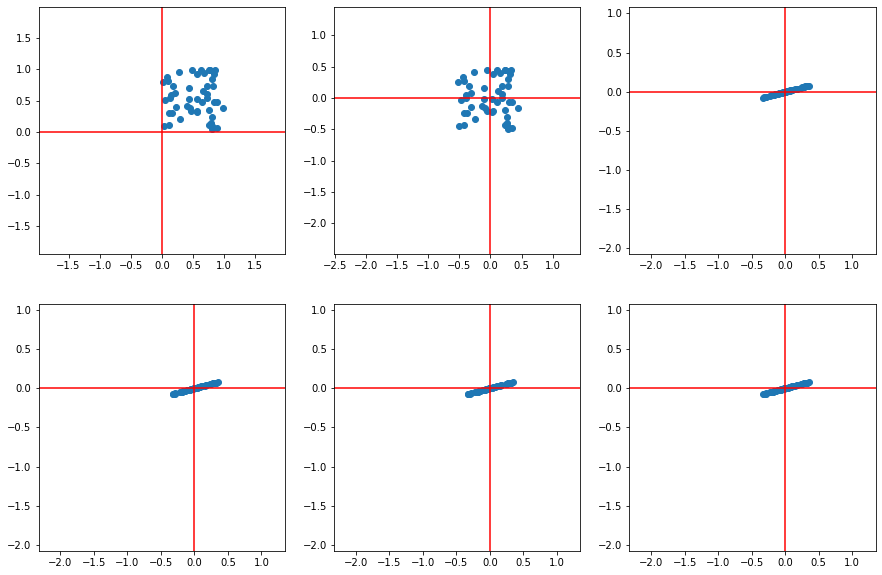

In [113]:
fig, axes = plt.subplots(2,3, figsize=(15,10))

#step-1
X = np.random.rand(50,2) 
X1 = X.copy() 
plot(X, axes[0,0])
axes[0,0].scatter(X[:, 0], X[:, 1])

#Step-2 Trừ đi mean của từng giá trị
X_meaned = X - np.mean(X , axis = 0)
mean = np.mean(X , axis = 0)
X = X - mean
plot(X, axes[0,1])
axes[0,1].scatter(X[:, 0], X[:, 1])

#Step-3 Tính cov matrix
#cov_mat = np.cov(X_meaned)
X = np.cov(X)
plot(X, axes[0,2])
axes[0,2].scatter(X[:, 0], X[:, 1])

#Step-4 Tính eigenvalues và eigenvector, Sắp xếp eigenvalues theo thứ tự giảm dần
eigen_values , eigen_vectors = np.linalg.eig(np.cov(X.T))

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

plot(X, axes[1,0])
axes[1,0].scatter(X[:, 0], X[:, 1])

#Step-5 Chọn số chiều giảm
n_components = 1
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
plot(X, axes[1,1])
axes[1,1].scatter(X[:, 0], X[:, 1])

#Step-6 Transform data
X_reduced = np.dot(eigenvector_subset.T,X1).transpose()
plot(X, axes[1,2])
axes[1,2].scatter(X[:, 0], X[:, 1])


# 2

In [114]:
iris = pd.read_csv("/content/drive/MyDrive/ML2/1/iris.data", names=['sepal length','sepal width','petal length','petal width','target'])
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
def pca(X , dim):
     #2
    X_meaned = X - np.mean(X , axis = 0)
    #3
    cov_mat = np.cov(X_meaned , rowvar = False)
    #4
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    #5
    eigenvector_subset = sorted_eigenvectors[:,0:dim]
    #6     
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [117]:
#prepare the data
x = iris.iloc[:,0:4]
 
#prepare the target
target = iris.iloc[:,4]
 
mat_reduced = pca(x , 2)
 
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [118]:
principal_df

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


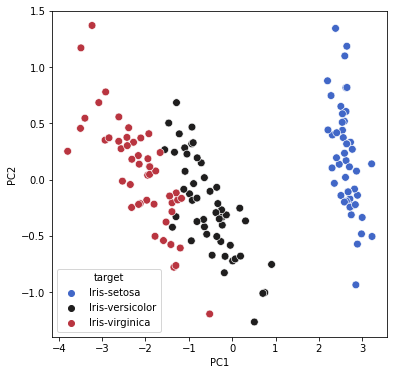

In [119]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' ,hue= 'target', s = 60 , palette= 'icefire')


# 3

In [120]:
from sklearn.decomposition import PCA

pca_trf = PCA(n_components=2)
skl_pca = pca_trf.fit_transform(x)

In [121]:
pca1 = pd.DataFrame(skl_pca , columns = ['PC1','PC2'])
print(pca1) 
pca1 = pd.concat([pca1 , pd.DataFrame(target)] , axis = 1)

          PC1       PC2
0   -2.684207  0.326607
1   -2.715391 -0.169557
2   -2.889820 -0.137346
3   -2.746437 -0.311124
4   -2.728593  0.333925
..        ...       ...
145  1.944017  0.187415
146  1.525664 -0.375021
147  1.764046  0.078519
148  1.901629  0.115877
149  1.389666 -0.282887

[150 rows x 2 columns]


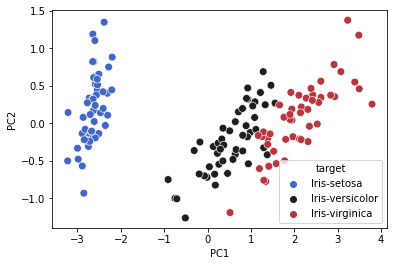

In [122]:
sns.scatterplot(data = pca1 , x = 'PC1',y = 'PC2' ,hue= 'target', s = 60 , palette= 'icefire')
plt.show()